In [1]:
import numpy as np
x=[0,30,60,90,120]#Voltage amplitudes at electrodes in Jaz experiments.
y=[0,75,170,280,390]#Pressure drops in Pa from Jaz experiments. I measured this off his eps plots 
xerror=[0,0,0,0,0]
yerror=[0,5,5,10,20]#I used the amount of waver in the eps plots as a guess about error in pressure measurement
p1=np.polyfit(x,y,3)#Fit the data to draw a line thru four real data points and zero, try a 3rd order polynomial
#And the result...does not look like a parabola, more like a parabola that gets lazy and turns into a line at higher voltages

#Jaz's ANSYS models of pressure drop vs voltage all had the V^2 dependence as expected for the linear regime.
#I will just use the parabola concept & try to find coefficients that map it onto the data 

A=0.08333 #Coefficients for calculating a parabola that runs thru 0,75 and 300
#But at 30V the thing has already left the linear range. This ends up looking nothing like the data

A=0.218  
#I got this A from noting that 10V applied voltage (at electrodes) and less, is the linear range where the parabola model is valid
#Because, here the trans-membrane voltage is less than 0.1V, comparable to the thermal voltage of 0.026V
#and in that range you could expect pressure going as E-squared (or V squared), from the linear model in Bazant's 2004 paper.

x2=np.linspace(0,75,50)#voltage range for polynomial
p2=[A,0,0]#polynomial coefficients for the parabola, in a form that works with polyval function
y2=np.polyval(p2,x2)
x1=np.linspace(0,120,100)
y1=np.polyval(p1,x1)#fit to data
np.polyval(p1,10)

21.827160493827119

/Users/cindyharnett/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


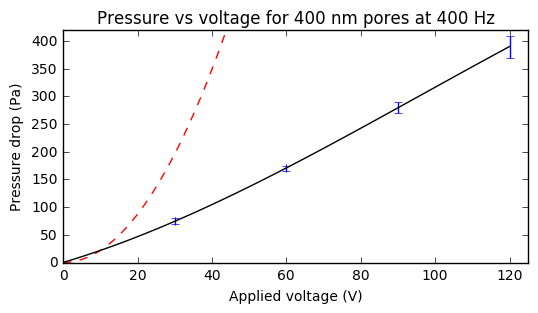

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(6,3))
plt.errorbar(x,y,yerror,xerror,ls='none')
plt.hold('true')
plt.plot(x2,y2,'r--')
plt.plot(x1,y1,'k')
plt.xlim(xmin=0,xmax=125)
plt.ylim(ymin=0,ymax=420)
plt.title('Pressure vs voltage for 400 nm pores at 400 Hz')
plt.xlabel('Applied voltage (V)')
plt.ylabel('Pressure drop (Pa)')
plt.savefig('PvsV.eps')


In [3]:
#The red parabola still looks a little goofy at the low end, where it dips below the experimental fit.
#However, we don't have data there, it's just an extrapolation between 0 and 30V
# Would be interesting to somehow measure those pressures at sub-30 volts or even 10 volts
#and see where the experiment (black line) begins to peel away from the linear model (red dashed line)
#But it's challenging to measure such small pressure drops (50 Pa and less). 
#Smaller pores might help generate higher pressures at voltages in the linear regime
#The pores used here were 400 nm
